# Train a model on our prepared data and features

In this notebook, we take the features generated and train different ML models on it to assess the predictiveness of the features and eventually create a good model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
df_unprocessed = pd.read_pickle('./yelp_dataset_processed/yelp_df_more_features_all_final.pkl')

Let's take a look at our dataframe created by merging the old and new datasets and creating the new features.

In [3]:
df_unprocessed.head()

,business_id,categories,categories_new,city,coordinates.latitude,coordinates.longitude,display_phone,found,found2,full_address,...,median_of_stars,stars_linear_coef,reactions_per_week,restaurant_density,restaurant_similar_density,zprice_all,zreview_count_all,zreview_per_week_all,zstar_all,is_chain
0,PzOqRohWw7F7YEPBz6AubA,"[Food, Bagels, Delis, Restaurants]","[{'alias': 'bagels', 'title': 'Bagels'}, {'ali...",Glendale,33.7136,-112.2,(623) 825-0355,1,1,"6520 W Happy Valley Rd\nSte 101\nGlendale Az, ...",...,4.0,-0.001885,0.005466,8.0,3.0,-0.093750,0.224796,1.448826,0.000000,True
1,qarobAbxGSHI7ygf1f7a_Q,"[Sandwiches, Restaurants]","[{'alias': 'sandwiches', 'title': 'Sandwiches'...",Gilbert,33.3787,-111.813,(480) 632-6453,1,1,"891 E Baseline Rd\nSuite 102\nGilbert, AZ 85233",...,4.0,-0.002145,0.002370,18.0,11.0,-0.138889,-0.819547,-0.092653,-0.005556,True
2,JxVGJ9Nly2FFIs_WpJvkug,"[Pizza, Restaurants]","[{'alias': 'italian', 'title': 'Italian'}, {'a...",Scottsdale,33.6175,-111.926,(480) 321-8800,1,1,"14418 N Scottsdale Rd\nSuite 181\nScottsdale, ...",...,4.0,-0.000699,0.005634,36.0,9.0,0.048611,-0.167804,-0.351388,0.066667,True
3,Jj7bcQ6NDfKoz4TXwvYfMg,"[Burgers, Restaurants]","[{'alias': 'burgers', 'title': 'Burgers'}, {'a...",Phoenix,33.567,-112.116,(602) 870-1111,1,1,"8941 N Black Canyon Hwy\nPhoenix, AZ 85021",...,4.0,0.001198,0.004906,27.0,11.0,0.105769,-0.179424,-0.214649,0.051852,True
4,4IAzFJ159GEaIGX1-y6Bmw,"[Burgers, Fast Food, Restaurants]","[{'alias': 'hotdogs', 'title': 'Fast Food'}, {...",Scottsdale,33.5819,-111.882,(480) 451-1803,1,1,"9251 E Shea Blvd\nScottsdale, AZ 85258",...,3.0,0.000182,0.007067,27.0,17.0,-0.115385,-0.644301,-0.682170,-0.170370,True


In [4]:
df_unprocessed.columns

Index(['business_id', 'categories', 'categories_new', 'city',
       'coordinates.latitude', 'coordinates.longitude', 'display_phone',
       'found', 'found2', 'full_address', 'hours', 'id', 'image_url', 'index',
       'is_claimed', 'is_closed', 'latitude', 'location.address1',
       'location.address2', 'location.address3', 'location.city',
       'location.country', 'location.cross_streets',
       'location.display_address', 'location.state', 'location.zip_code',
       'longitude', 'name', 'name_new', 'neighborhoods', 'open', 'phone',
       'photos', 'price', 'rating', 'review_count', 'review_count_new',
       'stars', 'state', 'transactions', 'type', 'url', 'reviews_per_week',
       'oldest_review', 'std_of_stars', 'median_of_stars', 'stars_linear_coef',
       'reactions_per_week', 'restaurant_density',
       'restaurant_similar_density', 'zprice_all', 'zreview_count_all',
       'zreview_per_week_all', 'zstar_all', 'is_chain'],
      dtype='object')

Percentage of closed restaurants:

In [5]:
len(df_unprocessed[df_unprocessed['is_closed']==1])/len(df_unprocessed)

0.23113916441238352

<IPython.core.display.Javascript object>


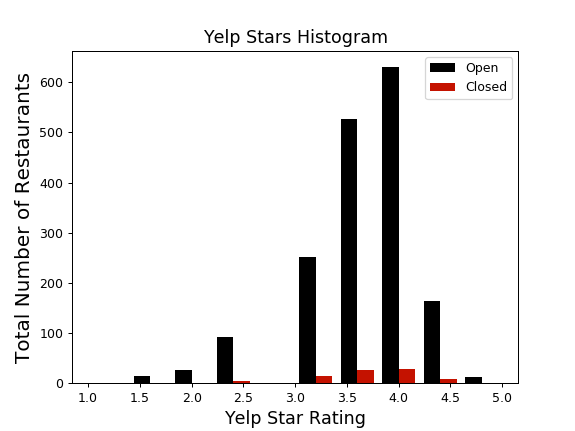

In [15]:
plt.hist([df_unprocessed[df_unprocessed['is_closed']==0].dropna()['stars'].values,\
          df_unprocessed[df_unprocessed['is_closed']==1].dropna()['stars'].values],\
        label=['Open','Closed'],color=['k','#c41200'])


plt.legend()
plt.title('Yelp Stars Histogram',fontsize=14)
plt.xlabel('Yelp Star Rating',fontsize=14)
plt.ylabel('Total Number of Restaurants',fontsize=16)

<IPython.core.display.Javascript object>


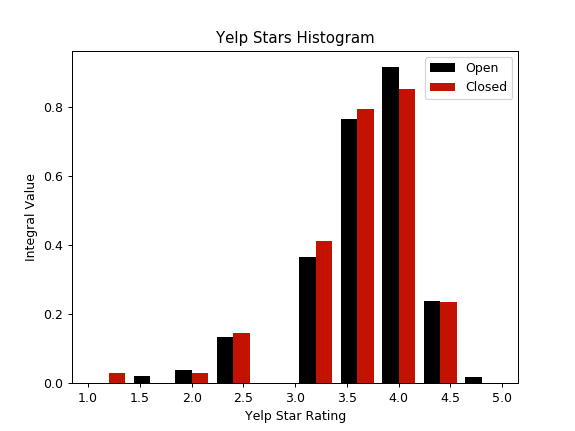

In [7]:
# The normed option normalizes in a way that the integral is 1 that means that the y-axis is not the percentage
plt.hist([df_unprocessed[df_unprocessed['is_closed']==0].dropna()['stars'].values,\
          df_unprocessed[df_unprocessed['is_closed']==1].dropna()['stars'].values],\
        label=['Open','Closed'],color=['k','#c41200'],normed=True)


plt.legend()
plt.title('Yelp Stars Histogram')
plt.xlabel('Yelp Star Rating')
plt.ylabel('Integral Value')

<IPython.core.display.Javascript object>


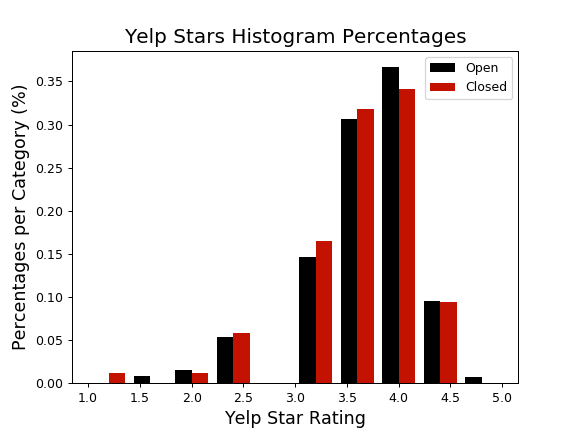

In [14]:
open_length = len(df_unprocessed[df_unprocessed['is_closed']==0].dropna()['stars'])
closed_length = len(df_unprocessed[df_unprocessed['is_closed']==1].dropna()['stars'])
weights = [np.ones(open_length)/open_length,np.ones(closed_length)/closed_length]
plt.hist([df_unprocessed[df_unprocessed['is_closed']==0].dropna()['stars'].values,\
          df_unprocessed[df_unprocessed['is_closed']==1].dropna()['stars'].values],\
        label=['Open','Closed'],color=['k','#c41200'],weights=weights)


plt.legend()
plt.title('Yelp Stars Histogram Percentages',fontsize=16)
plt.xlabel('Yelp Star Rating',fontsize=14)
plt.ylabel('Percentages per Category (%)',fontsize=14)

<IPython.core.display.Javascript object>


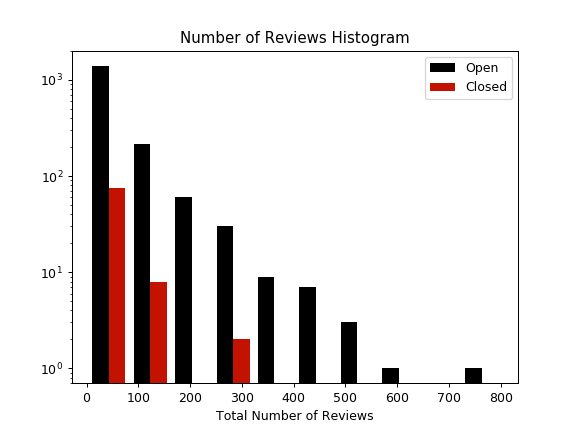

In [8]:
plt.hist([df_unprocessed[df_unprocessed['is_closed']==0].dropna()['review_count'].values,\
          df_unprocessed[df_unprocessed['is_closed']==1].dropna()['review_count'].values],\
        label=['Open','Closed'],color=['k','#c41200'],log=True)


plt.legend()
plt.title('Number of Reviews Histogram')
plt.xlabel('Total Number of Reviews')

<IPython.core.display.Javascript object>


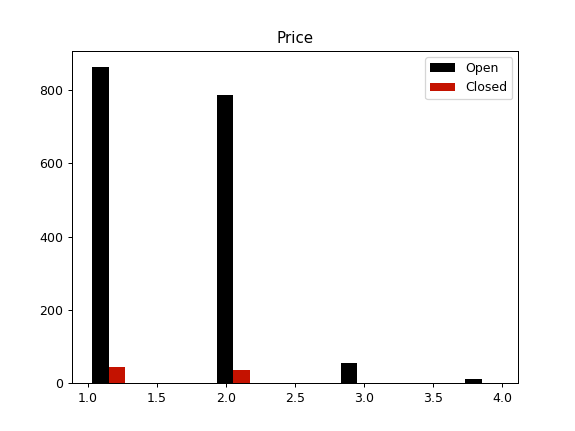

In [9]:
plt.hist([df_unprocessed[df_unprocessed['is_closed']==0].dropna()['price'].values,\
          df_unprocessed[df_unprocessed['is_closed']==1].dropna()['price'].values],\
        label=['Open','Closed'],color=['k','#c41200'])


plt.legend()
plt.title('Price')

In [10]:
df_ml = df_unprocessed[['review_count','stars','price','oldest_review','std_of_stars','reviews_per_week',\
                        'median_of_stars','reactions_per_week','stars_linear_coef','restaurant_density',\
                        'restaurant_similar_density','zreview_count_all','zstar_all','zprice_all','zreview_per_week_all',\
                        'is_claimed','is_chain','is_closed']]

In [11]:
len(df_ml)

3327

In [12]:
df_ml_clean = df_ml.dropna(axis = 0)

In [13]:
len(df_ml_clean)

3181

We just lost 146 values by dropping the nan rows. Let's check if the percentage of closed restaurants has changed.

In [14]:
len(df_ml_clean[df_ml_clean['is_closed']==1])/len(df_ml_clean)

0.22320025149324113

In [15]:
# Split in features and target
df_ml_features = df_ml_clean.drop('is_closed',axis = 1)
df_ml_target = df_ml_clean['is_closed']

In [16]:
df_ml_features

,review_count,stars,price,oldest_review,std_of_stars,reviews_per_week,median_of_stars,reactions_per_week,stars_linear_coef,restaurant_density,restaurant_similar_density,zreview_count_all,zstar_all,zprice_all,zreview_per_week_all,is_claimed,is_chain
0,14,3.5,1.0,5306.0,1.277753,0.002639,4.0,0.005466,-0.001885,8.0,3.0,0.224796,0.000000,-0.093750,1.448826,True,True
1,10,3.5,1.0,4641.0,1.333333,0.001939,4.0,0.002370,-0.002145,18.0,11.0,-0.819547,-0.005556,-0.138889,-0.092653,True,True
2,55,4,2.0,15974.0,1.012270,0.003380,4.0,0.005634,-0.000699,36.0,9.0,-0.167804,0.066667,0.048611,-0.351388,True,True
3,23,4,2.0,14063.0,1.203335,0.001635,4.0,0.004906,0.001198,27.0,11.0,-0.179424,0.051852,0.105769,-0.214649,True,True
4,3,2.5,1.0,9905.0,0.942809,0.000303,3.0,0.007067,0.000182,27.0,17.0,-0.644301,-0.170370,-0.115385,-0.682170,False,True
5,9,3,2.0,16114.0,0.916246,0.000559,3.0,0.001055,0.000270,29.0,8.0,-0.572180,-0.113793,0.055556,-0.657940,True,True
6,27,4,1.0,14266.0,1.301456,0.001823,4.0,0.003435,-0.000434,24.0,1.0,-0.204700,0.079167,-0.145833,-0.291928,True,False
7,38,4,1.0,13517.0,1.024627,0.002811,4.0,0.011467,-0.000353,12.0,3.0,0.140302,0.108333,0.000000,0.023595,True,True
8,69,3.5,1.0,9310.0,1.028475,0.007411,4.0,0.022664,0.000008,50.0,19.0,0.084421,-0.020000,-0.214286,0.461169,True,True
9,13,3.5,1.0,14154.0,1.002954,0.000918,4.0,0.003321,-0.001033,18.0,4.0,-0.563356,-0.022222,-0.132353,-0.637285,True,True


In [17]:
# Try different classification techniques
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

clf = LogisticRegression(random_state=0)
clf_A = GaussianNB()
clf_B = DecisionTreeClassifier(random_state=1)
clf_C = GradientBoostingClassifier(random_state=1)
clf_D = RandomForestClassifier(random_state=1)

Let's split the dataset on training and test set and then apply check how the above algorithms perform.

In [57]:
X_train, X_test, y_train, y_test = train_test_split(df_ml_features, df_ml_target, test_size = 0.2, random_state = 10,\
                                                    stratify = df_ml_target)

In [78]:
clf.fit(X_train,list(y_train.values))
y_pred = clf.predict(X_test)
print('Accuracy: ',clf.score(X_test,list(y_test.values)))
print('Precision: ',precision_score(list(y_test.values),y_pred))
print('Recall: ',recall_score(list(y_test.values),y_pred))
print('F1 Score: ',f1_score(list(y_test.values),y_pred))
print('Confusion Matrix: \n',confusion_matrix(list(y_test.values), y_pred))

Accuracy:  0.810047095761
Precision:  0.733333333333
Recall:  0.232394366197
F1 Score:  0.352941176471
Confusion Matrix: 
 [[483  12]
 [109  33]]


In [79]:
clf_A.fit(X_train,list(y_train.values))
y_pred_A = clf_A.predict(X_test)
print('Accuracy: ',clf_A.score(X_test,list(y_test.values)))
print('Precision: ',precision_score(list(y_test.values),y_pred_A))
print('Recall: ',recall_score(list(y_test.values),y_pred_A))
print('F1 Score: ',f1_score(list(y_test.values),y_pred_A))
print('Confusion Matrix: \n',confusion_matrix(list(y_test.values), y_pred_A))

Accuracy:  0.783359497645
Precision:  0.518181818182
Recall:  0.401408450704
F1 Score:  0.452380952381
Confusion Matrix: 
 [[442  53]
 [ 85  57]]


In [80]:
clf_B.fit(X_train,list(y_train.values))
y_pred_B = clf_B.predict(X_test)
print('Accuracy: ',clf_B.score(X_test,list(y_test.values)))
print('Precision: ',precision_score(list(y_test.values),y_pred_B))
print('Recall: ',recall_score(list(y_test.values),y_pred_B))
print('F1 Score: ',f1_score(list(y_test.values),y_pred_B))
print('Confusion Matrix: \n',confusion_matrix(list(y_test.values), y_pred_B))

Accuracy:  0.734693877551
Precision:  0.406896551724
Recall:  0.415492957746
F1 Score:  0.411149825784
Confusion Matrix: 
 [[409  86]
 [ 83  59]]


In [81]:
clf_C.fit(X_train,list(y_train.values))
y_pred_C = clf_C.predict(X_test)
print('Accuracy: ',clf_C.score(X_test,list(y_test.values)))
print('Precision: ',precision_score(list(y_test.values),y_pred_C))
print('Recall: ',recall_score(list(y_test.values),y_pred_C))
print('F1 Score: ',f1_score(list(y_test.values),y_pred_C))
print('Confusion Matrix: \n',confusion_matrix(list(y_test.values), y_pred_C))

Accuracy:  0.800627943485
Precision:  0.682926829268
Recall:  0.197183098592
F1 Score:  0.306010928962
Confusion Matrix: 
 [[482  13]
 [114  28]]


In [82]:
clf_D.fit(X_train,list(y_train.values))
y_pred_D = clf_D.predict(X_test)
print('Accuracy: ',clf_D.score(X_test,list(y_test.values)))
print('Precision: ',precision_score(list(y_test.values),y_pred_D))
print('Recall: ',recall_score(list(y_test.values),y_pred_D))
print('F1 Score: ',f1_score(list(y_test.values),y_pred_D))
print('Confusion Matrix: \n',confusion_matrix(list(y_test.values), y_pred_D))

Accuracy:  0.777080062794
Precision:  0.5
Recall:  0.183098591549
F1 Score:  0.268041237113
Confusion Matrix: 
 [[469  26]
 [116  26]]


For better comparison between the models let's draw the ROC curves.

<IPython.core.display.Javascript object>


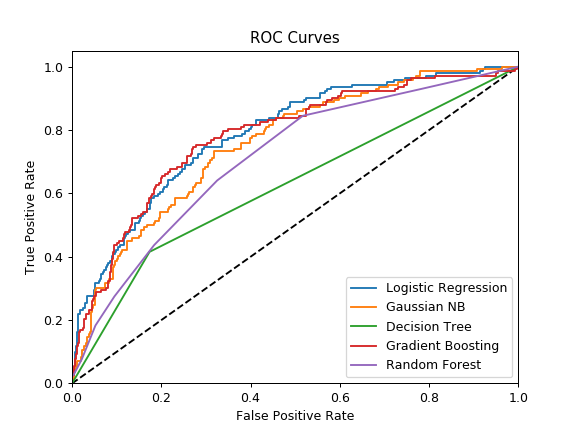

In [83]:
y_score = clf.decision_function(X_test)
y_score_A = clf_A.predict_proba(X_test)[:,1]
y_score_B = clf_B.predict_proba(X_test)[:,1]
y_score_C = clf_C.decision_function(X_test)
y_score_D = clf_D.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test.values,y_score)
fpr_A, tpr_A, _ = roc_curve(y_test.values,y_score_A)
fpr_B, tpr_B, _ = roc_curve(y_test.values,y_score_B)
fpr_C, tpr_C, _ = roc_curve(y_test.values,y_score_C)
fpr_D, tpr_D, _ = roc_curve(y_test.values,y_score_D)
plt.plot([0,1],[0,1],'k--')

plt.plot(fpr,tpr,label='Logistic Regression')
plt.plot(fpr_A,tpr_A,label='Gaussian NB')
plt.plot(fpr_B,tpr_B,label='Decision Tree')
plt.plot(fpr_C,tpr_C,label='Gradient Boosting')
plt.plot(fpr_D,tpr_D,label='Random Forest')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

<IPython.core.display.Javascript object>


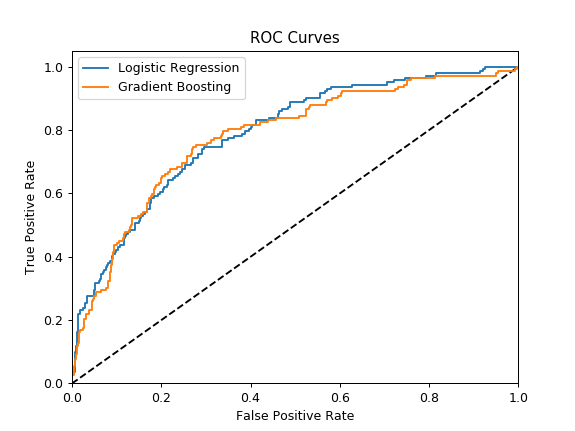

In [93]:
fpr, tpr, _ = roc_curve(y_test.values,y_score)
fpr_C, tpr_C, _ = roc_curve(y_test.values,y_score_C)

plt.plot([0,1],[0,1],'k--')

plt.plot(fpr,tpr,label='Logistic Regression')

plt.plot(fpr_C,tpr_C,label='Gradient Boosting')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

Let's rank the features in terms of importance.

In [84]:
importances = clf_D.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_D.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(X_test.shape[1]):
    print("%d. feature: %s (%f)" % (f + 1, df_ml_features.iloc[:,indices[f]].name, importances[indices[f]]))
    #print("%d. feature: %s (%f)" % (f + 1, df_ml_features.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature: stars_linear_coef (0.088545)
2. feature: oldest_review (0.088221)
3. feature: zreview_count_all (0.082250)
4. feature: reviews_per_week (0.079987)
5. feature: reactions_per_week (0.079429)
6. feature: restaurant_density (0.073548)
7. feature: zprice_all (0.072880)
8. feature: zstar_all (0.071496)
9. feature: std_of_stars (0.070992)
10. feature: zreview_per_week_all (0.065118)
11. feature: review_count (0.059142)
12. feature: restaurant_similar_density (0.050655)
13. feature: is_chain (0.034543)
14. feature: is_claimed (0.029766)
15. feature: stars (0.019821)
16. feature: median_of_stars (0.019251)
17. feature: price (0.014357)


In [65]:
df_ml_features.columns

Index(['review_count', 'stars', 'price', 'oldest_review', 'std_of_stars',
       'reviews_per_week', 'median_of_stars', 'reactions_per_week',
       'stars_linear_coef', 'restaurant_density', 'restaurant_similar_density',
       'zreview_count_all', 'zstar_all', 'zprice_all', 'zreview_per_week_all',
       'is_claimed', 'is_chain'],
      dtype='object')

In [138]:
# Labels to be used for feature importance, same order as column labels
labels = ['Review Count', 'Star Rating', 'Price', 'Age', 'Std of Star Rating',\
          'Reviews per Week', 'Median of Star Rating', 'Reaction to Reviews per Week',\
          'Linear Coef of Stars', 'Restaurant Density', 'Similar Restaurant Density',\
          'Relative Review Count', 'Relative Star Rating', 'Relative Price', 'Relative Reviews per Week',\
          'Business Claimed', 'Chain']
len(labels)

17

(-1, 17)

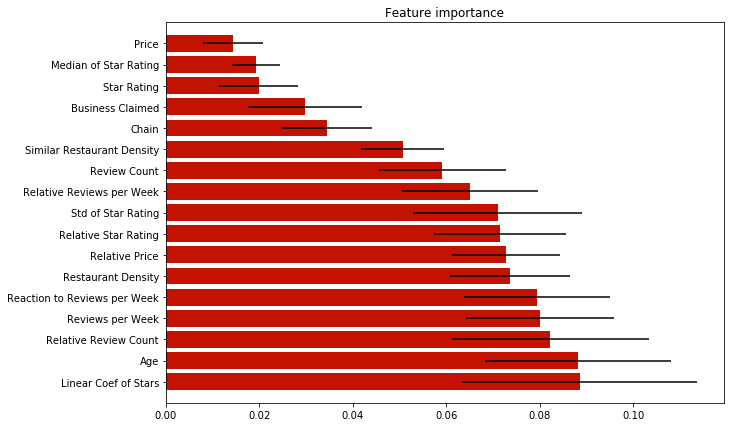

In [74]:
# Random forest
plt.figure(figsize=(10,7))
plt.title("Feature importance")
plt.barh(range(X_test.shape[1]), importances[indices],
       color="#c41200", xerr=std[indices], align="center")
#plt.yticks(range(X_test.shape[1]), df_ml_features.iloc[:,indices].columns)
plt.yticks(range(X_test.shape[1]), [labels[i] for i in indices])
plt.ylim([-1, X_test.shape[1]])


In [86]:
# Gradient Boosting importances
importances2 = clf_C.feature_importances_
#std2 = np.std([tree.feature_importances_ for tree in clf_C.estimators_],axis=0)
indices2 = np.argsort(importances2)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(X_test.shape[1]):
    print("%d. feature: %s (%f)" % (f + 1, df_ml_features.iloc[:,indices2[f]].name, importances2[indices2[f]]))
    #print("%d. feature: %s (%f)" % (f + 1, df_ml_features.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature: stars_linear_coef (0.108402)
2. feature: restaurant_density (0.105026)
3. feature: oldest_review (0.104446)
4. feature: zprice_all (0.080204)
5. feature: zstar_all (0.076730)
6. feature: zreview_per_week_all (0.074433)
7. feature: zreview_count_all (0.073708)
8. feature: reviews_per_week (0.073448)
9. feature: is_chain (0.053863)
10. feature: reactions_per_week (0.046508)
11. feature: restaurant_similar_density (0.044900)
12. feature: std_of_stars (0.042140)
13. feature: is_claimed (0.040702)
14. feature: review_count (0.032195)
15. feature: price (0.021110)
16. feature: stars (0.017472)
17. feature: median_of_stars (0.004713)


(-1, 17)

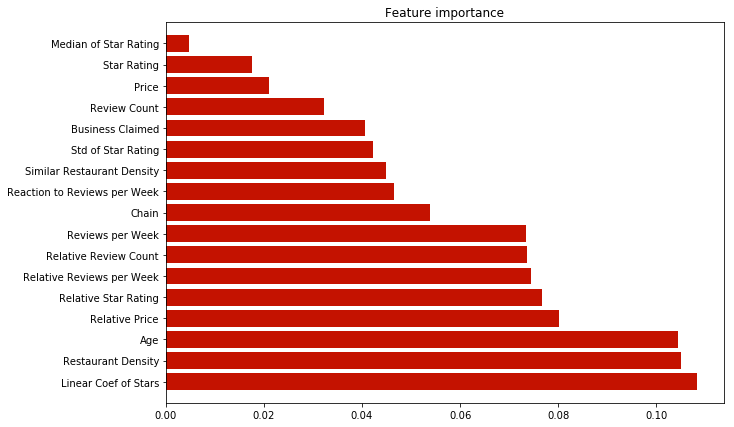

In [89]:
# Gradient boosting
% matplotlib inline
plt.figure(figsize=(10,7))
plt.title("Feature importance")
plt.barh(range(X_test.shape[1]), importances2[indices2],
       color="#c41200", align="center")
#plt.yticks(range(X_test.shape[1]), df_ml_features.iloc[:,indices].columns)
plt.yticks(range(X_test.shape[1]), [labels[i] for i in indices2])
plt.ylim([-1, X_test.shape[1]])


Let's take a look at the histograms of the most important features.

<IPython.core.display.Javascript object>


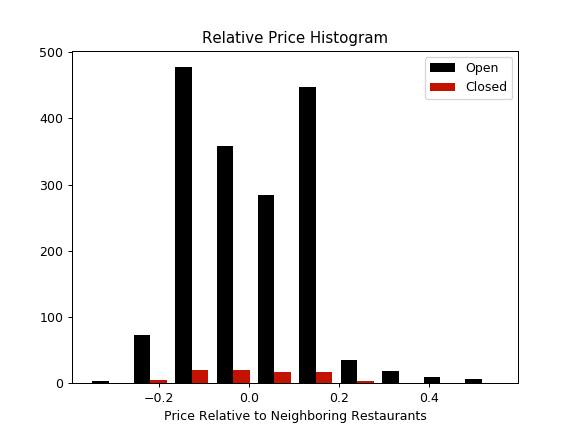

In [24]:
plt.hist([df_unprocessed[df_unprocessed['is_closed']==0].dropna()['zprice_all'].values,\
          df_unprocessed[df_unprocessed['is_closed']==1].dropna()['zprice_all'].values],\
        label=['Open','Closed'],color=['k','#c41200'])


plt.legend()
plt.title('Relative Price Histogram')
plt.xlabel('Price Relative to Neighboring Restaurants')

<IPython.core.display.Javascript object>


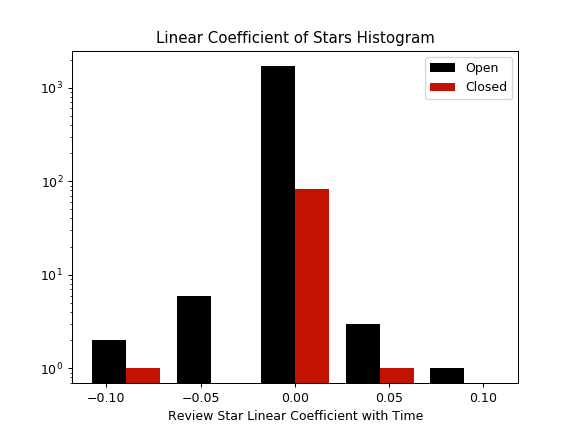

In [29]:
plt.hist([df_unprocessed[df_unprocessed['is_closed']==0].dropna()['stars_linear_coef'].values,\
          df_unprocessed[df_unprocessed['is_closed']==1].dropna()['stars_linear_coef'].values],\
        label=['Open','Closed'],color=['k','#c41200'],bins=5,log=True)


plt.legend()
plt.title('Linear Coefficient of Stars Histogram')
plt.xlabel('Review Star Linear Coefficient with Time')

<IPython.core.display.Javascript object>


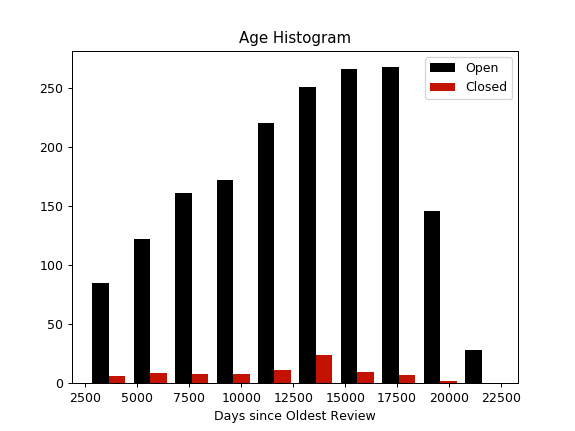

In [26]:
plt.hist([df_unprocessed[df_unprocessed['is_closed']==0].dropna()['oldest_review'].values,\
          df_unprocessed[df_unprocessed['is_closed']==1].dropna()['oldest_review'].values],\
        label=['Open','Closed'],color=['k','#c41200'])


plt.legend()
plt.title('Age Histogram')
plt.xlabel('Days since Oldest Review')

<IPython.core.display.Javascript object>


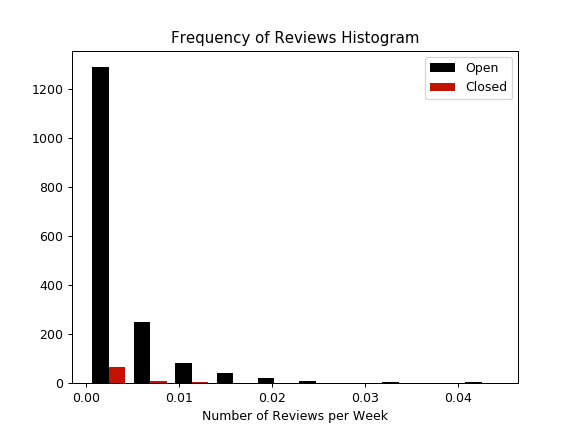

In [27]:
plt.hist([df_unprocessed[df_unprocessed['is_closed']==0].dropna()['reviews_per_week'].values,\
          df_unprocessed[df_unprocessed['is_closed']==1].dropna()['reviews_per_week'].values],\
        label=['Open','Closed'],color=['k','#c41200'])


plt.legend()
plt.title('Frequency of Reviews Histogram')
plt.xlabel('Number of Reviews per Week')

<IPython.core.display.Javascript object>


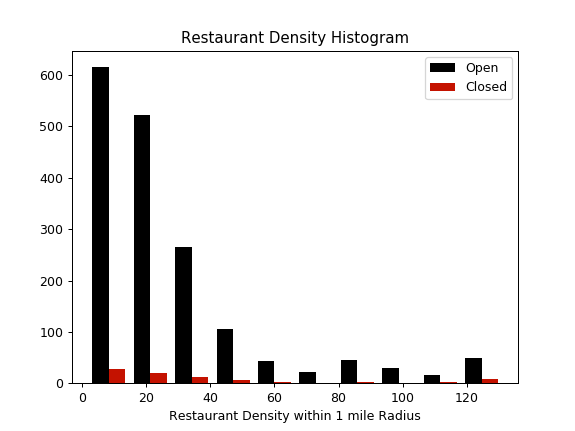

In [91]:
plt.hist([df_unprocessed[df_unprocessed['is_closed']==0].dropna()['restaurant_density'].values,\
          df_unprocessed[df_unprocessed['is_closed']==1].dropna()['restaurant_density'].values],\
        label=['Open','Closed'],color=['k','#c41200'])


plt.legend()
plt.title('Restaurant Density Histogram')
plt.xlabel('Restaurant Density within 1 mile Radius')

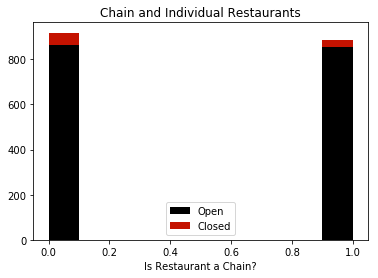

In [119]:
plt.hist([df_unprocessed[df_unprocessed['is_closed']==0].dropna()['is_chain'].values,\
          df_unprocessed[df_unprocessed['is_closed']==1].dropna()['is_chain'].values],\
        label=['Open','Closed'],color=['k','#c41200'],stacked=True)


plt.legend()
plt.title('Chain and Individual Restaurants')
plt.xlabel('Is Restaurant a Chain?')

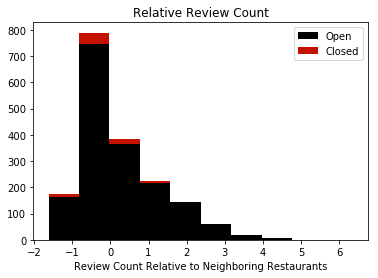

In [123]:
plt.hist([df_unprocessed[df_unprocessed['is_closed']==0].dropna()['zreview_count_all'].values,\
          df_unprocessed[df_unprocessed['is_closed']==1].dropna()['zreview_count_all'].values],\
        label=['Open','Closed'],color=['k','#c41200'],stacked=True)


plt.legend()
plt.title('Relative Review Count')
plt.xlabel('Review Count Relative to Neighboring Restaurants')

Scaling features might have an effect on the Logistic Regression algorithm since L2 regularization is used. We can test this by scaling the features using the sklearn standard scaler.

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
scaler.fit(df_ml_features)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [21]:
df_ml_features_scaled = scaler.transform(df_ml_features)

In [22]:
# We need to save y values as trained too even though they are not scaled to avoid confusion with previous split
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(df_ml_features_scaled, \
                                                    df_ml_target, test_size = 0.2, random_state = 10,\
                                                    stratify = df_ml_target)

In [35]:
clf.fit(X_train_scaled,list(y_train_scaled.values))
y_pred_scaled = clf.predict(X_test_scaled)
print('Accuracy: ',clf.score(X_test_scaled,list(y_test_scaled.values)))
print('Precision: ',precision_score(list(y_test_scaled.values),y_pred_scaled))
print('Recall: ',recall_score(list(y_test_scaled.values),y_pred_scaled))
print('F1 Score: ',f1_score(list(y_test_scaled.values),y_pred_scaled))
print('Confusion Matrix: \n',confusion_matrix(list(y_test_scaled.values), y_pred_scaled))

Accuracy:  0.817896389325
Precision:  0.809523809524
Recall:  0.239436619718
F1 Score:  0.369565217391
Confusion Matrix: 
 [[487   8]
 [108  34]]


In [23]:
clf.fit(X_train_scaled,list(y_train_scaled.values))
y_pred_scaled = clf.predict(X_test_scaled)
print('Accuracy: ',clf.score(X_test_scaled,list(y_test_scaled.values)))
print('Precision: ',precision_score(list(y_test_scaled.values),y_pred_scaled,pos_label=False))
print('Recall: ',recall_score(list(y_test_scaled.values),y_pred_scaled,pos_label=False))
print('F1 Score: ',f1_score(list(y_test_scaled.values),y_pred_scaled,pos_label=False))
print('Confusion Matrix: \n',confusion_matrix(list(y_test_scaled.values), y_pred_scaled))

Accuracy:  0.817896389325
Precision:  0.818487394958
Recall:  0.983838383838
F1 Score:  0.893577981651
Confusion Matrix: 
 [[487   8]
 [108  34]]


Accuracy and precision improved with the scaled features. This should have no effect on Gradient boosting but let's use the same dataset for both methods and then optimize.

In [24]:
clf_C.fit(X_train_scaled,list(y_train_scaled.values))
y_pred_scaled_C = clf_C.predict(X_test_scaled)
print('Accuracy: ',clf_C.score(X_test_scaled,list(y_test_scaled.values)))
print('Precision: ',precision_score(list(y_test_scaled.values),y_pred_scaled_C,pos_label=False))
print('Recall: ',recall_score(list(y_test_scaled.values),y_pred_scaled_C,pos_label=False))
print('F1 Score: ',f1_score(list(y_test_scaled.values),y_pred_scaled_C,pos_label=False))
print('Confusion Matrix: \n',confusion_matrix(list(y_test_scaled.values), y_pred_scaled_C))

Accuracy:  0.794348508634
Precision:  0.806397306397
Recall:  0.967676767677
F1 Score:  0.879706152433
Confusion Matrix: 
 [[479  16]
 [115  27]]


Confusion matrix, without normalization
[[479  16]
 [115  27]]


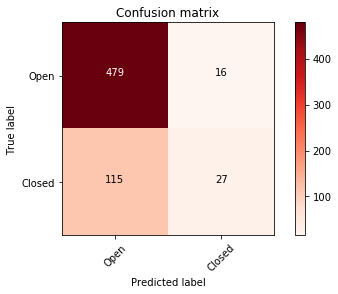

In [163]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(confusion_matrix(list(y_test_scaled.values), y_pred_scaled_C),\
                          classes=['Open','Closed'],title='Confusion matrix')

The results were actually slightly worse than earlier. This could be because of overfitting but we can improve the results through Grid Search optimization.

## Grid Search with Cross Validation

We will apply Grid Search and cross validation to optimize the parameters of Logistic Regression and Gradient Boosting. The targeting application is to decide which restaurant to provide a loan to. For this, we will optimize precision (considering restaurant not closing as the positive result) as we want to minimize the number of False Positive (i.e. restaurants that will fail but are recognized as "not failing").

### Optimization of the Logistic Regression Model

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [26]:
param_grid = {'penalty' : ['l1','l2'],'C': [0.01,0.1,1.,10.], 'intercept_scaling': [0.0005,0.001,0.005,0.01,0.1,1.,10.]}
scorer = make_scorer(precision_score,pos_label=False)
gscv = GridSearchCV(clf,param_grid,scoring=scorer)
gscv.fit(X_train_scaled,list(y_train_scaled.values))

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1.0, 10.0], 'intercept_scaling': [0.0005, 0.001, 0.005, 0.01, 0.1, 1.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(precision_score, pos_label=False), verbose=0)

In [27]:
gscv.best_params_

{'C': 1.0, 'intercept_scaling': 0.001, 'penalty': 'l2'}

In [28]:
# Best precision score for Grid Search Logistic Regression
gscv.best_score_

0.89237310541127768

In [29]:
# Save model
clf_optimized = gscv.best_estimator_

In [31]:
y_pred_scaled = clf_optimized.predict(X_test_scaled)
print('Accuracy: ',clf_optimized.score(X_test_scaled,list(y_test_scaled.values)))
print('Precision: ',precision_score(list(y_test_scaled.values),y_pred_scaled))
print('Recall: ',recall_score(list(y_test_scaled.values),y_pred_scaled))
print('F1 Score: ',f1_score(list(y_test_scaled.values),y_pred_scaled))
print('Confusion Matrix: \n',confusion_matrix(list(y_test_scaled.values), y_pred_scaled))

Accuracy:  0.645211930926
Precision:  0.362745098039
Recall:  0.781690140845
F1 Score:  0.495535714286
Confusion Matrix: 
 [[300 195]
 [ 31 111]]


In [34]:
y_pred_scaled = clf_optimized.predict(X_test_scaled)
print('Accuracy: ',clf_optimized.score(X_test_scaled,list(y_test_scaled.values)))
print('Precision: ',precision_score(list(y_test_scaled.values),y_pred_scaled,pos_label=False))
print('Recall: ',recall_score(list(y_test_scaled.values),y_pred_scaled,pos_label=False))
print('F1 Score: ',f1_score(list(y_test_scaled.values),y_pred_scaled,pos_label=False))
print('Confusion Matrix: \n',confusion_matrix(list(y_test_scaled.values), y_pred_scaled,labels=[True,False]))

Accuracy:  0.645211930926
Precision:  0.906344410876
Recall:  0.606060606061
F1 Score:  0.726392251816
Confusion Matrix: 
 [[111  31]
 [195 300]]


Confusion matrix, without normalization
[[300 195]
 [ 31 111]]


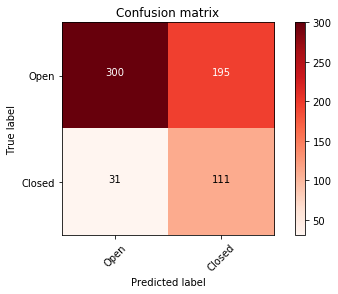

In [165]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

y_pred_scaled = clf_optimized.predict(X_test_scaled)
plot_confusion_matrix(confusion_matrix(list(y_test_scaled.values), y_pred_scaled),\
                          classes=['Open','Closed'],title='Confusion matrix')

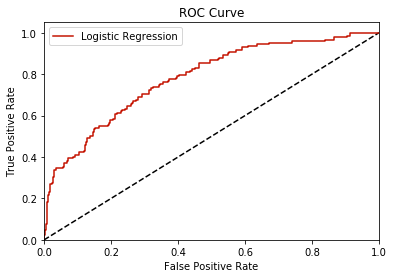

In [170]:
y_score_scaled = clf_optimized.decision_function(X_test_scaled)
fpr, tpr, _ = roc_curve(list(y_test_scaled.values),y_score_scaled)

plt.plot([0,1],[0,1],'k--')

plt.plot(fpr,tpr,'#c41200',label='Logistic Regression')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

In [133]:
# List of features
df_ml_features.columns

Index(['review_count', 'stars', 'price', 'oldest_review', 'std_of_stars',
       'reviews_per_week', 'median_of_stars', 'reactions_per_week',
       'stars_linear_coef', 'restaurant_density', 'restaurant_similar_density',
       'zreview_count_all', 'zstar_all', 'zprice_all', 'zreview_per_week_all',
       'is_claimed', 'is_chain'],
      dtype='object')

In [86]:
# Feature Importance scores
np.std(X_test_scaled,axis=0)*clf_optimized.coef_[0]

array([-0.16513039, -0.03485509,  0.21519146, -0.04331095,  0.05491404,
       -0.20232877,  0.01061574,  0.21263086, -0.01742669,  0.31513059,
       -0.16184205, -0.33171091,  0.00097509, -0.03457577,  0.24216156,
       -0.30960687, -0.36138657])

In [134]:
abs(np.std(X_test_scaled,axis=0)*clf_optimized.coef_)
# Importances with signs
importances_scaled_sign = np.std(X_test_scaled,axis=0)*clf_optimized.coef_[0]
# Absolute value of importances
importances_scaled = abs(np.std(X_test_scaled,axis=0)*clf_optimized.coef_[0])

indices_scaled = np.argsort(importances_scaled)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(X_train_scaled.shape[1]):
    print("%d. feature: %s (%f)" % (f + 1, df_ml_features.iloc[:,indices_scaled[f]].name,\
                                    importances_scaled_sign[indices_scaled[f]]))
    

Feature ranking:
1. feature: is_chain (-0.361387)
2. feature: zreview_count_all (-0.331711)
3. feature: restaurant_density (0.315131)
4. feature: is_claimed (-0.309607)
5. feature: zreview_per_week_all (0.242162)
6. feature: price (0.215191)
7. feature: reactions_per_week (0.212631)
8. feature: reviews_per_week (-0.202329)
9. feature: review_count (-0.165130)
10. feature: restaurant_similar_density (-0.161842)
11. feature: std_of_stars (0.054914)
12. feature: oldest_review (-0.043311)
13. feature: stars (-0.034855)
14. feature: zprice_all (-0.034576)
15. feature: stars_linear_coef (-0.017427)
16. feature: median_of_stars (0.010616)
17. feature: zstar_all (0.000975)


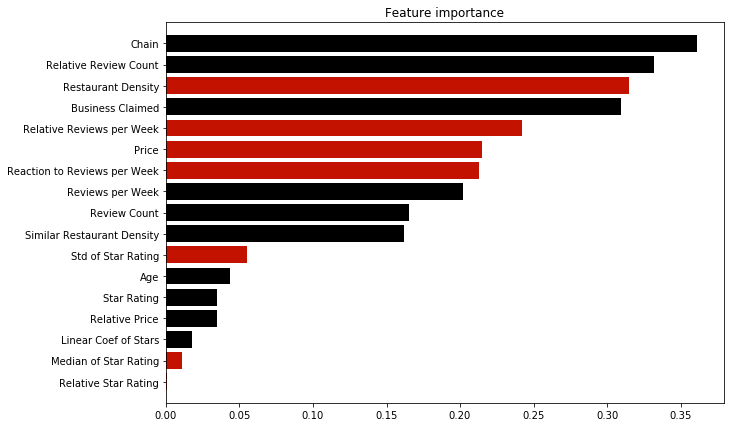

In [158]:
# Plot feature importance for logistic regression
%matplotlib inline
plt.figure(figsize=(10,7))
plt.title("Feature importance")
# Color list, black for open, red for closed
color_list = ["#c41200" if i>0 else "k" for i in importances_scaled_sign]
open_labels = ["Closed" if i>0 else "Open" for i in importances_scaled_sign]

plt.barh(range(X_train_scaled.shape[1]), importances_scaled[indices_scaled][::-1],
       color=np.array(color_list)[indices_scaled][::-1],\
         align="center", label = np.array(open_labels)[indices_scaled][::-1])
#plt.yticks(range(X_test.shape[1]), df_ml_features.iloc[:,indices].columns)
plt.yticks(range(X_train_scaled.shape[1]), [labels[i] for i in indices_scaled[::-1]])
plt.ylim([-1, X_train_scaled.shape[1]])

plt.savefig('Feature_importance.png')

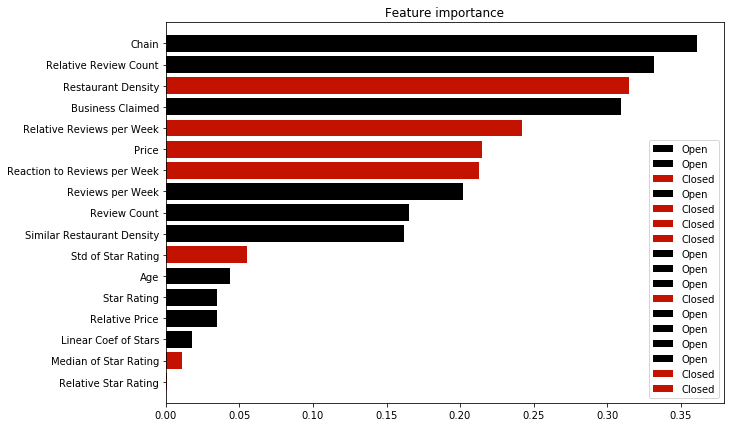

In [157]:
# Add labels unsuccesfully
plt.figure(figsize=(10,7))
plt.title("Feature importance")
# Color list, black for open, red for closed
color_list = ["#c41200" if i>0 else "k" for i in importances_scaled_sign]
open_labels = ["Closed" if i>0 else "Open" for i in importances_scaled_sign]
for i, index in enumerate(indices_scaled[::1]):
    plt.barh(16-i, importances_scaled[index],color = color_list[index], align="center", label = open_labels[index])

#plt.yticks(range(X_test.shape[1]), df_ml_features.iloc[:,indices].columns)
plt.yticks(range(X_train_scaled.shape[1]), [labels[i] for i in indices_scaled[::-1]])
plt.ylim([-1, X_train_scaled.shape[1]])
plt.legend()

### Optimization of the Gradient Boosting model

Here, we tried optimizing precision at the gradient boosting model but the value achieved was lower than for the logistic regression model.

In [70]:
param_grid_C = {'n_estimators': [150,100,150,200,250,300],\
                'max_depth': [3,4,5,6],'min_samples_split': [3,4,5,6,8,10,20],\
                'min_impurity_split': [0.,0.001,0.01], 'max_features': [4,5,6,7,8]}

gscv_C = GridSearchCV(clf_C,param_grid_C,scoring=scorer)
gscv_C.fit(X_train_scaled,list(y_train_scaled.values))

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=1,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [150, 100, 150, 200, 250, 300], 'max_depth': [3, 4, 5, 6], 'min_samples_split': [3, 4, 5, 6, 8, 10, 20], 'min_impurity_split': [0.0, 0.001, 0.01], 'max_features': [4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(precision_score, pos_label=False), verbose=0)

In [71]:
gscv_C.best_params_

{'max_depth': 4,
 'max_features': 6,
 'min_impurity_split': 0.0,
 'min_samples_split': 6,
 'n_estimators': 200}

In [72]:
gscv_C.best_score_

0.81554203703506412

In [73]:
clf_C_optimized = gscv_C.best_estimator_

In [74]:
y_pred_scaled_C = clf_C_optimized.predict(X_test_scaled)
print('Accuracy: ',clf_C_optimized.score(X_test_scaled,list(y_test_scaled.values)))
print('Precision: ',precision_score(list(y_test_scaled.values),y_pred_scaled_C,pos_label=False))
print('Recall: ',recall_score(list(y_test_scaled.values),y_pred_scaled_C,pos_label=False))
print('F1 Score: ',f1_score(list(y_test_scaled.values),y_pred_scaled_C,pos_label=False))
print('Confusion Matrix: \n',confusion_matrix(list(y_test_scaled.values), y_pred_scaled_C))

Accuracy:  0.794348508634
Precision:  0.817073170732
Recall:  0.947474747475
F1 Score:  0.877455565949
Confusion Matrix: 
 [[469  26]
 [105  37]]
